In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("http://51.91.120.89/extras/veturilo.csv", usecols=["ts","qnty"], parse_dates=True, index_col="ts")
df.head()

,qnty
ts,
2020-07-10 18:55:00,2
2020-07-10 19:00:00,2
2020-07-10 19:05:00,2
2020-07-10 19:10:00,2
2020-07-10 19:15:00,12


In [19]:
df.index

DatetimeIndex(['2020-07-10 18:55:00', '2020-07-10 19:00:00',
               '2020-07-10 19:05:00', '2020-07-10 19:10:00',
               '2020-07-10 19:15:00', '2020-07-10 19:20:00',
               '2020-07-10 19:25:00', '2020-07-10 19:30:00',
               '2020-07-10 19:35:00', '2020-07-10 19:40:00',
               ...
               '2020-07-31 10:10:00', '2020-07-31 10:15:00',
               '2020-07-31 10:20:00', '2020-07-31 10:25:00',
               '2020-07-31 10:30:00', '2020-07-31 10:35:00',
               '2020-07-31 10:40:00', '2020-07-31 10:45:00',
               '2020-07-31 10:50:00', '2020-07-31 10:55:00'],
              dtype='datetime64[ns]', name='ts', length=5948, freq=None)

In [20]:
df.qnty.unique()

array(['2', '12', '7', '9', '8', '6', '5', '4', '1', '10', '11', '0', '3',
       '16', '17', '14', '15', '13', '18', '19', '?'], dtype=object)

In [21]:
df.qnty = df.qnty.replace("?", np.NaN).fillna(method="ffill").astype('uint8')

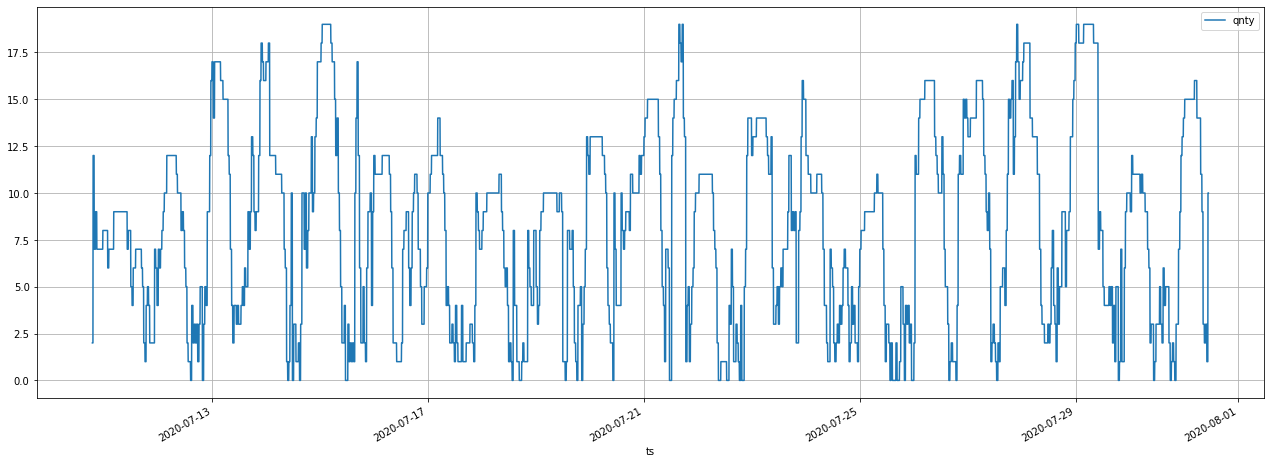

In [22]:
df.plot(grid=True, figsize=(22,8))

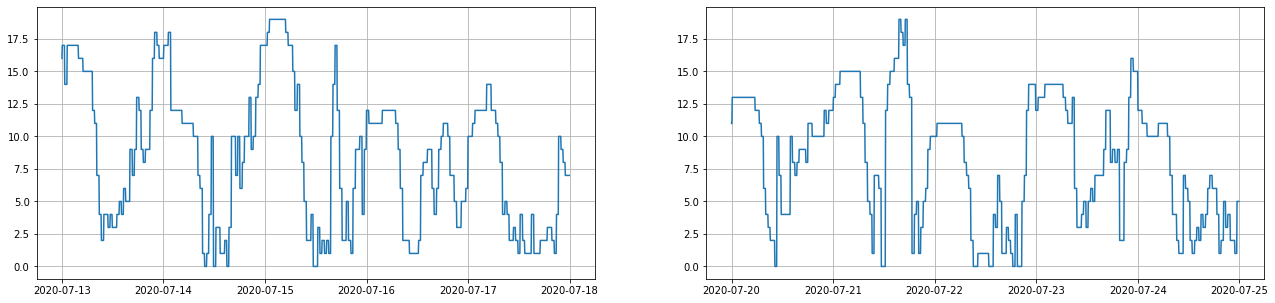

In [23]:
plt.subplots(1, 2, figsize=(22,5))

df13_17 = df.loc["2020-07-13":"2020-07-17"]
plt.subplot(1, 2, 1)
plt.plot(df13_17.index, df13_17.qnty)
plt.grid()


df20_24 = df.loc["2020-07-20":"2020-07-24"]
plt.subplot(1, 2, 2)
plt.plot(df20_24.index, df20_24.qnty)
plt.grid()

In [24]:
from statsmodels.stats.stattools import durbin_watson

2.044378661289986


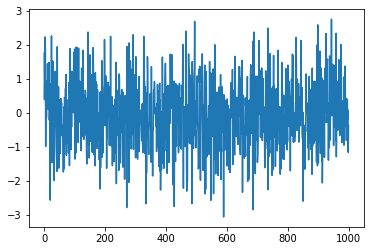

In [25]:
np.random.seed(0)
y = np.random.normal(0, 1, 1000)

plt.plot(y)
print(durbin_watson(y))

0.009886173184214862


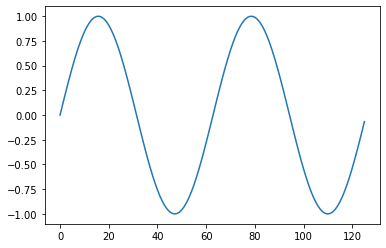

In [26]:
np.random.seed(0)
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)

plt.plot(y)
print(durbin_watson(y))

0.01273107592987821


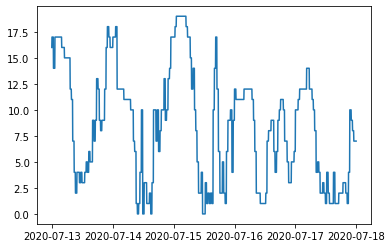

In [27]:
plt.plot(df13_17.index, df13_17.qnty)
print(durbin_watson(df13_17.qnty))

0.010403013741540339


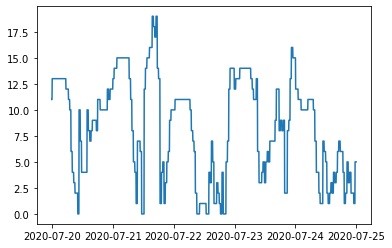

In [28]:
plt.plot(df20_24.index, df20_24.qnty)
print(durbin_watson(df20_24.qnty))

In [29]:
!pip install fbprophet -q

In [30]:
from fbprophet import Prophet

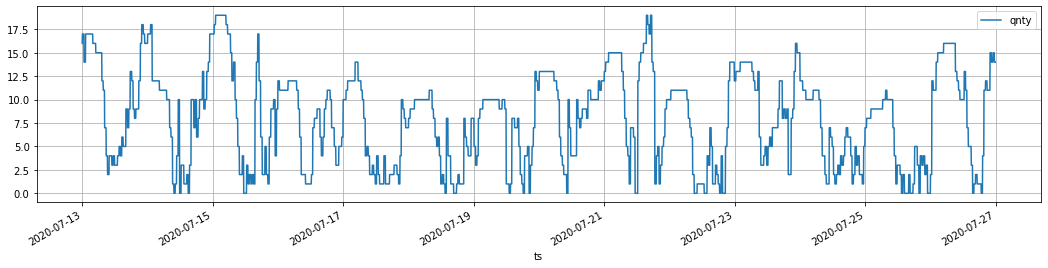

In [32]:
df_predict = df.loc["2020-07-13":"2020-07-26"]
df_predict.plot(grid=True, figsize=(18,4))

In [34]:
df_predict.reset_index(inplace=True)
df_predict.columns = ["ds", "y"]
df_predict.head()

,ds,y
0,2020-07-13 00:00:00,16
1,2020-07-13 00:05:00,17
2,2020-07-13 00:10:00,17
3,2020-07-13 00:15:00,17
4,2020-07-13 00:20:00,17


In [36]:
model = Prophet()
model.fit(df_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=48, freq='H')
future

In [39]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-13 00:00:00,10.865037,9.642711,18.143812,10.865037,10.865037,3.283123,3.283123,3.283123,3.283123,3.283123,3.283123,0.0,0.0,0.0,14.148160
1,2020-07-13 00:05:00,10.861747,9.605556,18.878235,10.861747,10.861747,3.354861,3.354861,3.354861,3.354861,3.354861,3.354861,0.0,0.0,0.0,14.216607
2,2020-07-13 00:10:00,10.858456,9.579960,18.830065,10.858456,10.858456,3.421064,3.421064,3.421064,3.421064,3.421064,3.421064,0.0,0.0,0.0,14.279520
3,2020-07-13 00:15:00,10.855166,9.598342,18.652774,10.855166,10.855166,3.481875,3.481875,3.481875,3.481875,3.481875,3.481875,0.0,0.0,0.0,14.337041
4,2020-07-13 00:20:00,10.851875,10.280383,19.069020,10.851875,10.851875,3.537464,3.537464,3.537464,3.537464,3.537464,3.537464,0.0,0.0,0.0,14.389339


In [40]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

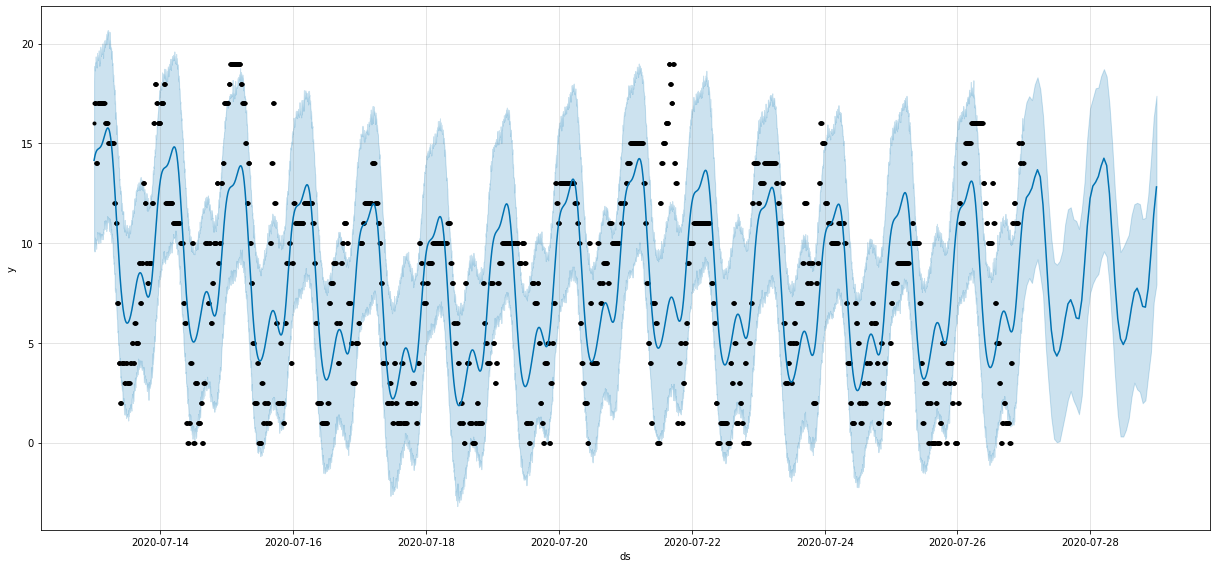

In [41]:
model.plot(forecast, figsize=(17,8))
plt.show()

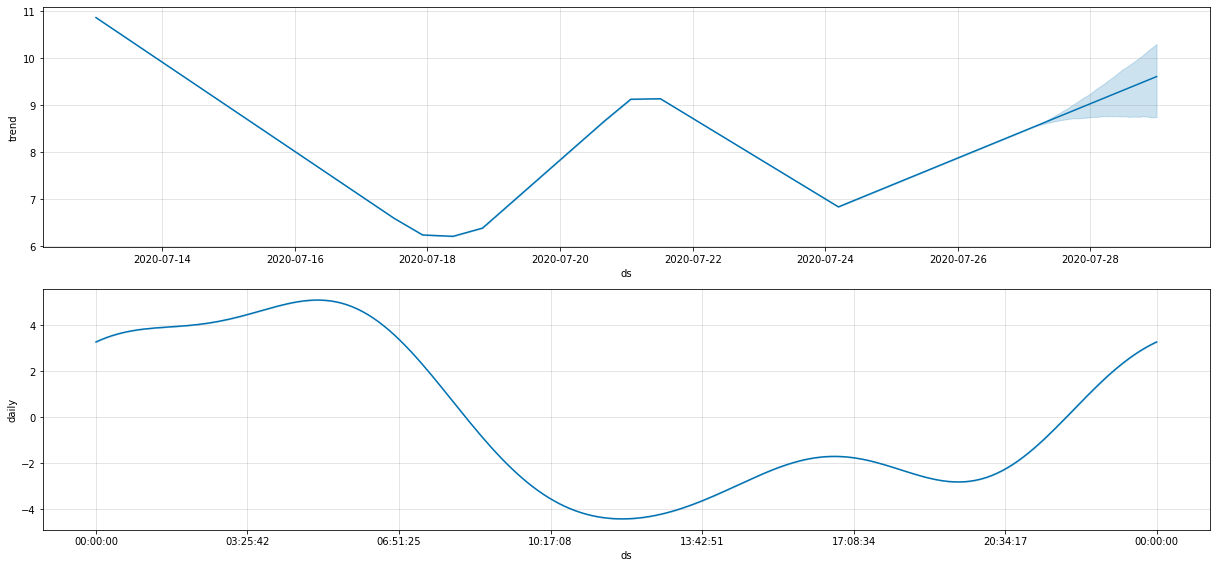

In [42]:
model.plot_components(forecast, figsize=(17,8))
plt.show()

In [43]:
df_2707 = df.loc["2020-07-27":"2020-07-28"]
df_2707

,qnty
ts,
2020-07-27 00:00:00,14
2020-07-27 00:05:00,13
2020-07-27 00:10:00,13
2020-07-27 00:15:00,13
2020-07-27 00:20:00,13
...,...
2020-07-28 23:35:00,16
2020-07-28 23:40:00,16
2020-07-28 23:45:00,18


In [45]:
df_tmp = forecast[ ["ds","yhat","yhat_lower","yhat_upper"] ].set_index('ds').loc["2020-07-27":"2020-07-28"]
df_tmp.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27 00:55:00,12.280544,7.892710,17.060314
2020-07-27 01:55:00,12.475460,8.248140,17.362445
2020-07-27 02:55:00,12.761696,8.000652,17.165515
2020-07-27 03:55:00,13.291591,8.765705,17.944857
2020-07-27 04:55:00,13.677960,9.189828,18.315027


In [46]:
df_res = pd.concat([df_2707, df_tmp], axis=1)
df_res.loc[ ["2020-07-27 20:55:00"] ]

,qnty,yhat,yhat_lower,yhat_upper
2020-07-27 20:55:00,13,7.14648,2.345148,11.672366


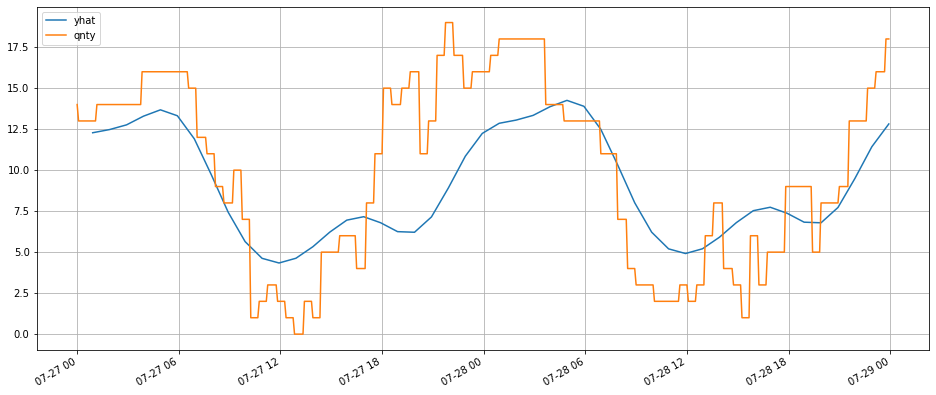

In [49]:
df_res.yhat[ ~df_res.yhat.isna() ].plot()
df_res.qnty.plot( figsize=(16,7), grid=True )
plt.legend();